In [9]:
from matplotlib import pyplot as plt

from pynba import halfgames_from_file, teams_from_file, team_id_to_abb, plot_ratings, plot_paces, use_blackontrans_style


league = "nba"
year = 2019
season_type = "Regular Season"

In [2]:
halfgames = halfgames_from_file(league, year, season_type)
team_stats = teams_from_file(league, year, season_type)
team_stats

In [16]:
team_id_to_team_abb = team_id_to_abb(league, year)
team_abb_to_team_id = {
    team_abb: team_id
    for team_id, team_abb in team_id_to_team_abb.items()
}
points_mu = halfgames["points_scored"].sum() / halfgames["possession_num"].sum() * 100
pace_mu = halfgames["possession_num"].sum() / halfgames["duration"].sum() * 12 * 4 * 60

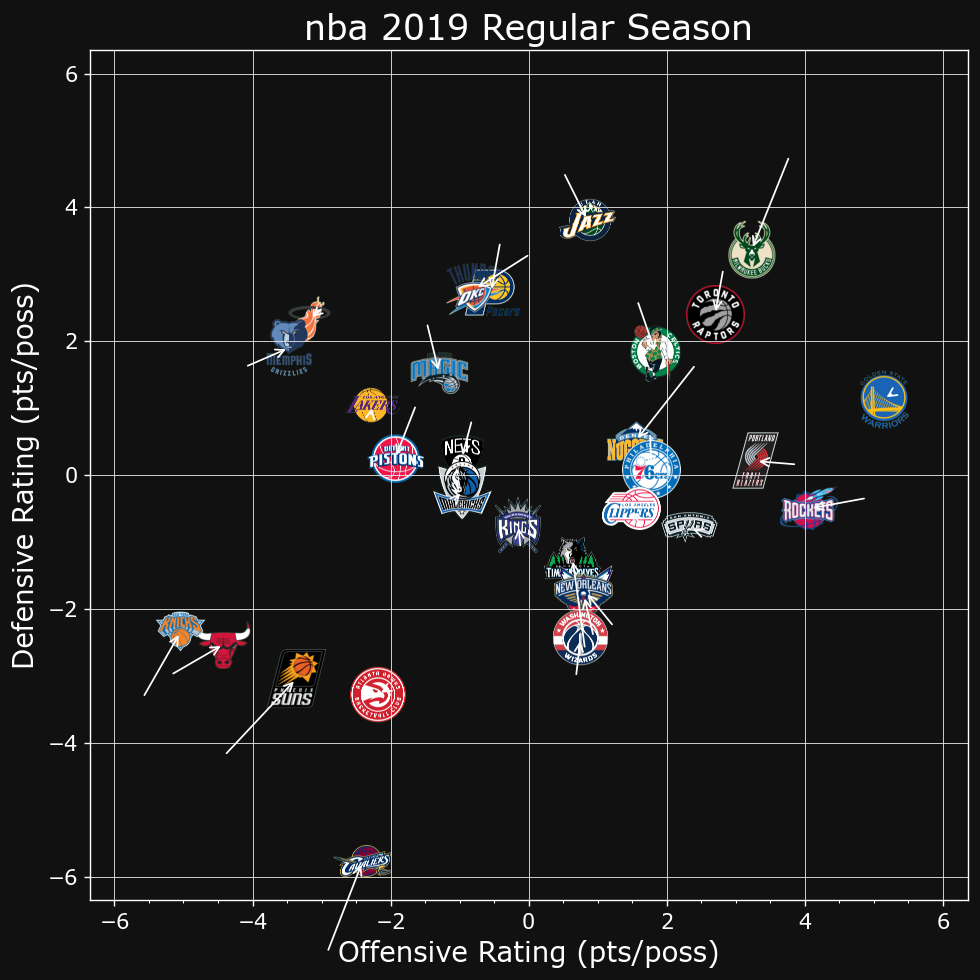

In [8]:
use_blackontrans_style()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
for team, off_aa, def_aa in zip(team_stats["team"], team_stats["off_scoring_above_average"], team_stats["def_scoring_above_average"]):
    team_id = team_abb_to_team_id[team]
    filt = halfgames["off_team_id"] == team_id
    raw_off = halfgames.loc[filt, "points_scored"].sum() / halfgames.loc[filt, "possession_num"].sum() * 100 - points_mu
    filt = halfgames["def_team_id"] == team_id
    raw_def = points_mu - halfgames.loc[filt, "points_scored"].sum() / halfgames.loc[filt, "possession_num"].sum() * 100
    ax.annotate("", xy=(off_aa, def_aa), xytext=(raw_off, raw_def), arrowprops={"arrowstyle": "->", "color": "white"})
plot_ratings(team_stats, ax)


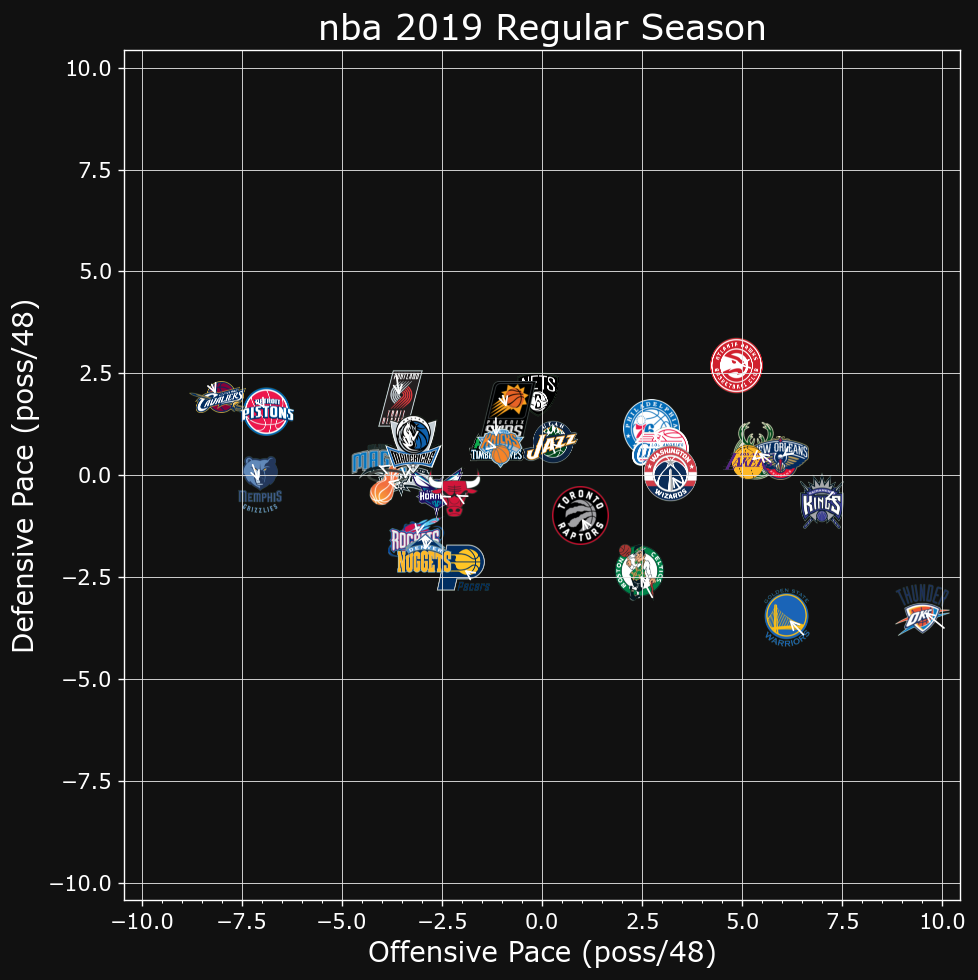

In [21]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
for team, off_aa, def_aa in zip(team_stats["team"], team_stats["off_pace_above_average"], team_stats["def_pace_above_average"]):
    team_id = team_abb_to_team_id[team]
    filt = halfgames["off_team_id"] == team_id
    raw_off = (halfgames.loc[filt, "possession_num"].sum() / halfgames.loc[filt, "duration"].sum() * 12 * 4 * 60 - pace_mu) / 2
    filt = halfgames["def_team_id"] == team_id
    raw_def = (halfgames.loc[filt, "possession_num"].sum() / halfgames.loc[filt, "duration"].sum() * 12 * 4 * 60 - pace_mu) / 2
    ax.annotate("", xy=(off_aa, def_aa), xytext=(raw_off, raw_def), arrowprops={"arrowstyle": "->", "color": "white"})
plot_paces(team_stats, ax)
